In [12]:
#결측치
import pandas as pd
import numpy as np


In [6]:
mpg = pd.read_csv('mpg.csv')

In [14]:
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

In [17]:
pd.isna(mpg['hwy']).sum()

5

In [20]:
pd.isna(mpg['drv']).sum()

0

In [23]:
mpg.dropna(subset = 'hwy')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [25]:
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

In [29]:
mpg.loc[[28,42,128,202], 'cty'] = [3, 4, 39, 42] 

In [58]:
mpg['drv'] = np.where(mpg['drv'].isin(['k']) == True, np.nan, mpg['drv'])
mpg['drv'].isna().sum()

4

In [46]:
#이상치
import seaborn as sns

<Axes: ylabel='cty'>

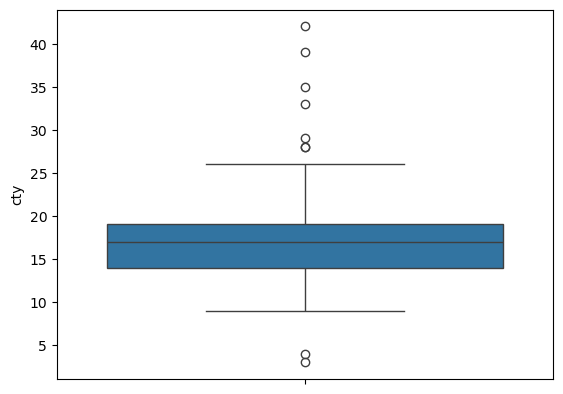

In [60]:
sns.boxplot(data = mpg, y = 'cty')

In [64]:
pct25 = mpg['cty'].quantile(.25)
pct25

14.0

In [66]:
pct75 = mpg['cty'].quantile(.75)
pct75

19.0

In [70]:
iqr = pct75-pct25
iqr

5.0

In [72]:
pct25-1.5*iqr

6.5

In [74]:
pct75+1.5*iqr

26.5

In [84]:
mpg['cty'] = np.where((mpg['cty'] > 26.5) | (mpg['cty'] < 6.5), np.nan, mpg['cty'])

In [86]:
mpg['cty'].isna().sum()

9

In [92]:
mpg.dropna(subset = ['cty', 'drv']).groupby('drv').agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333


<Axes: xlabel='cty', ylabel='hwy'>

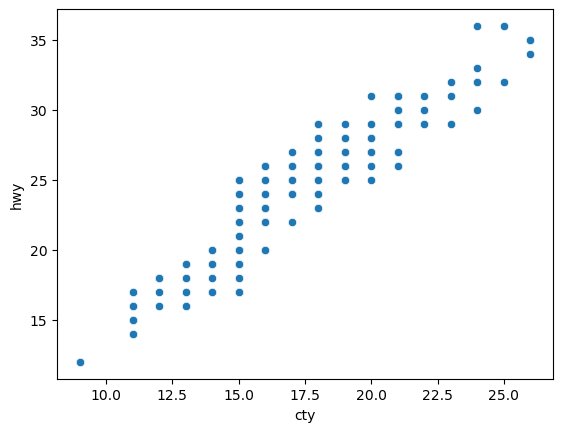

In [94]:
#그래프 만들기
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

In [97]:
midwest = pd.read_csv('midwest.csv')

[(0.0, 500000.0), (0.0, 10000.0)]

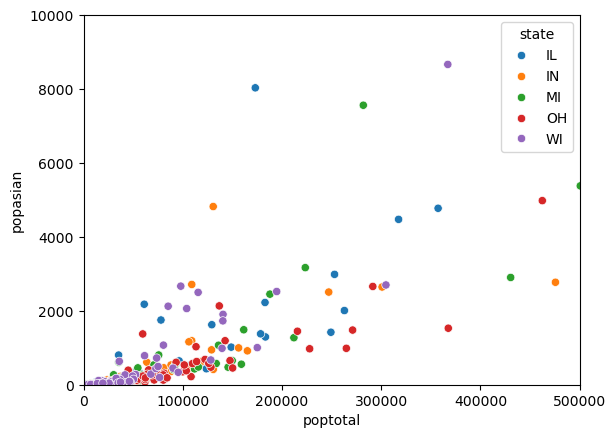

In [103]:
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian', hue = 'state').set(xlim = [0, 500000], ylim = [0, 10000])

In [141]:
graph = mpg.query('category == "suv"').groupby('manufacturer', as_index = False).agg(mean_cty = ('cty', 'mean')).sort_values(by = 'mean_cty', ascending = False).head(5)
graph

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.571429
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

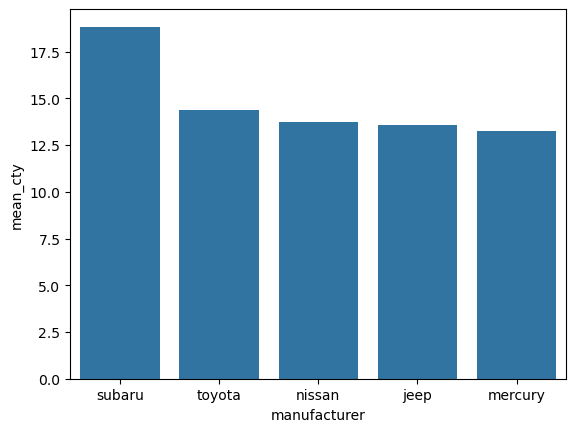

In [147]:
sns.barplot(data = graph, x = 'manufacturer', y = 'mean_cty')

In [165]:
new_mpg = mpg.groupby('category').agg(count = ('category', 'count')).sort_values(by = 'count', ascending = False)
new_mpg

,count
category,
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5


<Axes: xlabel='category', ylabel='count'>

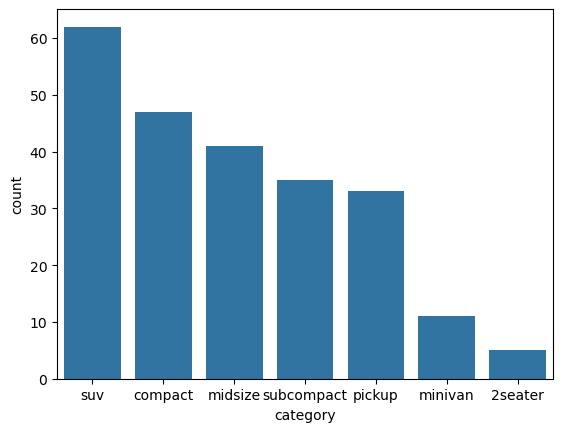

In [167]:
sns.barplot(data = new_mpg, x = 'category', y = 'count')